<a href="https://colab.research.google.com/github/jenishgosalia/ChatGPTTrial/blob/main/MakeMore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Init*

Goal is to

1.   maximize the likelihood of the data w.r.t to model parameters
2.   i.e. eq to maximize the log likelihood (because log is monotonic)
3.   i.e. eq to minimize the negative log likelihood
4.   i.e. eq t minimize the average negative log likelihood

In [ ]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch.nn.functional as F
import random

In [ ]:
path = open('sample_data/names.txt','r')
words = path.read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)

32033

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)
#g = torch.Generator().manual_seed(2147483647)
#g1 = torch.Generator().manual_seed(2147483647 + 10)
torch.manual_seed(42)

In [ ]:

def build_dataset(words, block_size):

  X, Y = [], []
  for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '---->', ch)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape,Y.shape)
  return X,Y


block_size = 8 #block size which feeds the previous input letter to predict the next letter

random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1],block_size)
Xdev, Ydev = build_dataset(words[n1:n2],block_size)
Xte, Yte = build_dataset(words[n2:], block_size)

#other configuration
max_steps = 200000
batch_size = 32

torch.Size([182625, 8]) torch.Size([182625])
torch.Size([22655, 8]) torch.Size([22655])
torch.Size([22866, 8]) torch.Size([22866])


# Bigram Method

In [ ]:
b = {}
for w in words [:]:
  chs = ['.'] + list(w) + ['.']
  for c1, c2 in zip(chs, chs[1:]):
    bigram = (c1,c2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
sorted(b.items(), key = lambda kv : -kv[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [ ]:
N = torch.zeros(27,27, dtype = torch.int32)


In [ ]:
for w in words [:]:
  chs = ['.'] + list(w) + ['.']
  for c1, c2 in zip(chs, chs[1:]):
    i = stoi[c1]
    j = stoi[c2]
    N[i,j] += 1

(-0.5, 26.5, 26.5, -0.5)

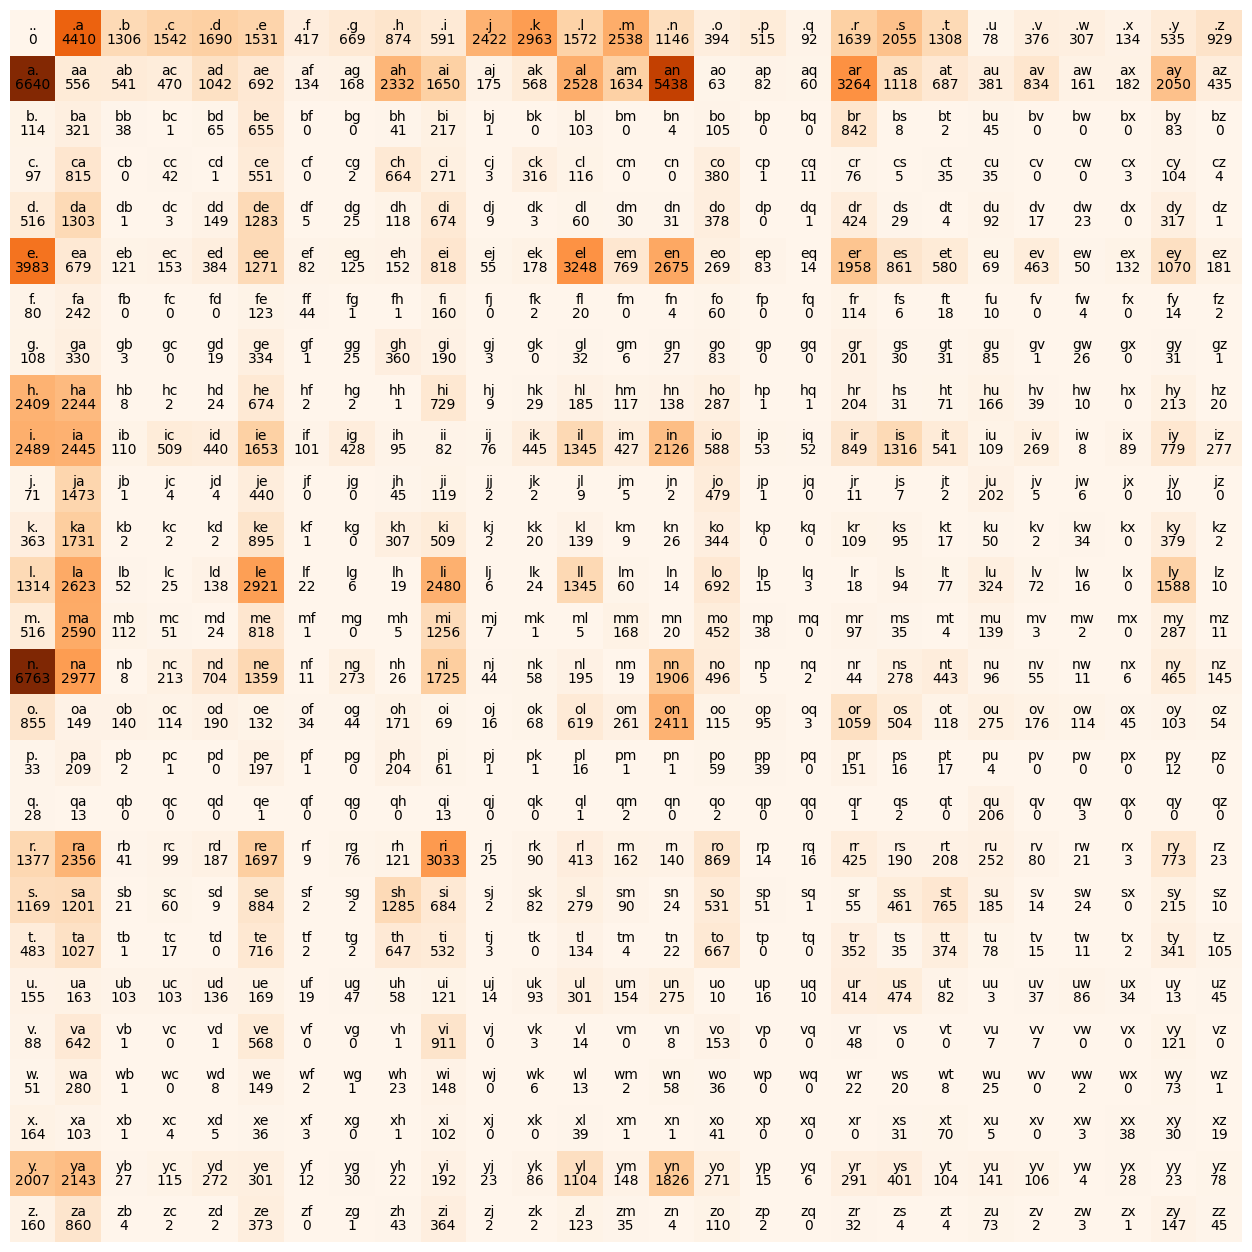

In [ ]:

plt.figure(figsize=(16,16))
plt.imshow(N, cmap = 'Oranges')
for i in range (27):
  for j in range (27):
    chstr = itos[i] + itos[j]
    plt.text(j,i,chstr, va='bottom', ha='center')
    plt.text(j,i,N[i,j].item(), va='top', ha='center')
plt.axis('off')

In [ ]:
P = (N+1).float()
P /= P.sum(1,keepdim=True)


for i in range(50):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p,num_samples=1,replacement=True).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))


junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.
jen.
janarta.
maly.
abely.
a.
i.
lavadoni.
themielyawat.
f.
modam.
tavilitikiesaloeverin.
n.
e.
kalbrenelah.
anen.
ch.
k.
jan.
odridrdenanialilpergha.
tezralelia.


<ipython-input-139-0df8fc9cb2a6>:3: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


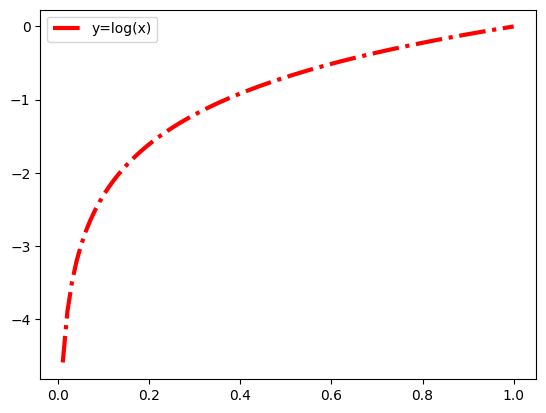

In [ ]:

# x and y data points
x = np.linspace(0, 1, 100)
y = np.log(x)


# Plot the x and y data points
plt.plot(x, y, c="red", lw=3, linestyle="dashdot", label="y=log(x)")

# Place the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
loglikehood = 0
for w in words [:3]:
  chs = ['.'] + list(w) + ['.']
  for c1, c2 in zip(chs, chs[1:]):
    i = stoi[c1]
    j = stoi[c2]
    prob = P[i,j]
    logprob = torch.log(prob)
    loglikehood += logprob
    print(f'{c1}{c2}: {prob=:.4f}: {logprob=:.4f}')

nll = -loglikehood
print(f'{nll=}')

.y: prob=0.0167: logprob=-4.0912
yu: prob=0.0145: logprob=-4.2346
uh: prob=0.0187: logprob=-3.9814
he: prob=0.0883: logprob=-2.4268
en: prob=0.1309: logprob=-2.0337
ng: prob=0.0149: logprob=-4.2045
g.: prob=0.0558: logprob=-2.8863
.d: prob=0.0527: logprob=-2.9423
di: prob=0.1222: logprob=-2.1020
io: prob=0.0332: logprob=-3.4045
on: prob=0.3030: logprob=-1.1941
nd: prob=0.0384: logprob=-3.2594
dr: prob=0.0770: logprob=-2.5646
re: prob=0.1334: logprob=-2.0143
e.: prob=0.1948: logprob=-1.6357
.x: prob=0.0042: logprob=-5.4701
xa: prob=0.1436: logprob=-1.9404
av: prob=0.0246: logprob=-3.7041
vi: prob=0.3508: logprob=-1.0476
ie: prob=0.0933: logprob=-2.3719
en: prob=0.1309: logprob=-2.0337
n.: prob=0.3685: logprob=-0.9982
nll=tensor(60.5414)


In [ ]:
#training data
xs, ys = [], []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for c1, c2 in zip(chs, chs[1:]):
    i = stoi[c1]
    j = stoi[c2]
    xs.append(i)
    ys.append(j)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


In [ ]:


#randomly initiate 27 neurons weights. each neuron receives 27 inputs
xenc = F.one_hot(xs, num_classes = 27).float()
W = torch.randn((27,27), requires_grad=True)

In [ ]:
loss_improvement = []

for i in range (10000):
  #forward pass
  logits = xenc @ W  # log of counts
  counts = logits.exp() #eq to N in above example
  prob = counts / counts.sum(1,keepdim=True)
  loss = -prob[torch.arange(len(xs)), ys].log().mean()
  loss_improvement.append(loss.item())

  #backward pass
  W.grad = None #set to zero
  loss.backward()

  #gradient update
  W.data += -50 * W.grad

KeyboardInterrupt: ignored

In [ ]:
x = torch.linspace(1,100,100)
plt.plot(x,loss_improvement)


In [ ]:
#sample test with the built neural network
for i in range(50):
  out = []
  ix = 0
  while True:
    xtest = F.one_hot(torch.tensor([ix]), num_classes = 27).float()
    logitstest = xtest @ W  # log of counts
    countstest = logitstest.exp() #eq to N in above example
    ptest = countstest / countstest.sum(1,keepdim=True)

    ix = torch.multinomial(ptest,num_samples=1,replacement=True).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

# MLP and Neural Netowrk Init

In [ ]:

n_embd = 10 #dimension of characters embedding vectors
n_hidden = 200 #no of neurons in the hidden layer

C = torch.randn((vocab_size,n_embd))
W1 = torch.randn((n_embd * block_size,n_hidden)) * (5/3) / ((n_embd * block_size) **0.5) #multiply by gain/sqrt(fan in) to remove tanh saturation
#no need of bias as batch normalization makes it redundant
b1 = torch.randn(n_hidden) * 0.01 #multiply by 0.01 to remove tanh saturation
W2 = torch.randn((n_hidden,vocab_size)) * 0.01 #multiply by 0.01 to remove the initial training loss less
b2 = torch.randn(27) * 0 #multiply by 0 to remove the initial training loss less

#batch normalization parameters
bngain = torch.ones((1,n_hidden))
bnbias = torch.zeros((1,n_hidden))

bnmean_running = torch.zeros((1,n_hidden))
bnstd_running = torch.ones((1,n_hidden))

parameters = [C,W1,b1,W2,b2,bngain,bnbias]

no_of_params = 0
for p in parameters:
  p.requires_grad = True
  no_of_params += p.nelement()

print(f'{no_of_params=}')

no_of_params=12297


In [ ]:
max_steps = 200000
batch_size = 32
lossi = []

# MLP Method

In [ ]:
for _ in range(max_steps):

  ix = torch.randint(0,Xtr.shape[0],(batch_size,))
  Xb, Yb = Xtr[ix], Ytr[ix]

  # forward pass
  emb = C[Xb] #embed characters into vector
  embcat = emb.view(emb.shape[0],-1) #concat the vectors
  hpreact = embcat @ W1 + b1 #hidden layer preactivation
  h = torch.tanh(hpreact) #hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits,Ytr[ix]) #loss function

  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  for p in parameters:
    p.data += -0.01 * p.grad

  #stats
  #lri.append(lre[_])
  lossi.append(loss.log10().item())

In [ ]:
plt.plot(lossi)

In [ ]:
#training loss
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ytr)
print(loss.item())

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha='center', va='center',color='white')
plt.grid('minor')

In [ ]:
#dev loss
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
print(loss.item())

In [ ]:
#sample the trained model

for i in range(20):
  out = []
  context = [0] * block_size
  while True:
    embtest = C[torch.tensor([context])]
    h = torch.tanh(embtest.view(1,-1)@ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits,dim=1)
    ix = torch.multinomial(probs,num_samples=1).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0: break

  print(''.join(itos[i] for i in out ))

# Neural Network Method

In [ ]:
for _ in range(max_steps):

  ix = torch.randint(0,Xtr.shape[0],(batch_size,))
  Xb, Yb = Xtr[ix], Ytr[ix]

  # forward pass
  emb = C[Xb] #embed characters into vector
  embcat = emb.view(emb.shape[0],-1) #concat the vectors  (N, block_size * n_embd)
  hpreact = embcat @ W1 + b1 #hidden layer preactivation no need of bias as batch normalization makes it redundant

  #batch normalize hidden pre activation
  bnmeani = hpreact.mean(0,keepdim=True)
  bnstdi = hpreact.std(0,keepdim=True)
  hpreact = bngain * ((hpreact - bnmeani) / bnstdi) + bnbias

  with torch.no_grad():
    bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
    bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi

  #relu = torch.nn.ReLU()
  #h = relu(hpreact) #hidden layer
  h  = torch.tanh(hpreact)
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits,Yb) #loss function

  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  lr = 0.1 if _ < 100000 else 0.01 #step learning decay
  for p in parameters:
    p.data += -lr * p.grad

  #stats
  lossi.append(loss.log10().item())

  #print stats sometimes
  if _ % 10000 == 0:
    print(f'{_:7d}/{max_steps:7d}: {loss.item():.4f}')


NameError: ignored

In [ ]:
plt.figure(figsize = (10,20))
plt.imshow(h.abs() > 0.99, cmap ='gray', interpolation='nearest')

NameError: ignored

<Figure size 1000x2000 with 0 Axes>

In [ ]:
plt.hist(h.view(-1).tolist(),50);

In [ ]:
plt.hist(hpreact.view(-1).tolist(),50);

In [ ]:
plt.plot(lossi)

In [ ]:
#calibrated batch normalization at the end of training
#
#with torch.no_grad():
#  emb = C[Xtr]
#  embcat = emb.view(emb.shape[0],-1) #concat the vectors  (N, block_size * n_embd)
#  hpreact = embcat @ W1 + b1 #hidden layer preactivation

#  #measure the mean and std
#  bnmean = hpreact.mean(0,keepdim=True)
#  bnstd = hpreact.std(0,keepdim=True)

In [ ]:
#validate loss
@torch.no_grad() #this decorator disables the gradient tracking
def split_loss(split):
  x,y = {
      'train' : {Xtr,Ytr},
      'val' : {Xdev, Ydev},
      'test': {Xte, Yte}
  }[split]
  emb = C[x]
  embcat = emb.view(emb.shape[0],-1)
  hpreact = embcat @ W1 + b1 #hidden layer preactivation

  #batch normalize hidden pre activation
  hpreact = bngain * ((hpreact - bnmean_running) / bnstd_running) + bnbias

  h = torch.tanh(hpreact) #hidden layer
  logits = h @ W2 + b2 # output layer
  loss = F.cross_entropy(logits,y) #loss function
  print(split, loss.item())

split_loss('train')
split_loss('val')


In [ ]:
#sample the trained model

for i in range(20):
  out = []
  context = [0] * block_size

  while True:
    #forward pass the neural network
    emb = C[torch.tensor([context])]
    embcat = emb.view(emb.shape[0],-1)
    hpreact = embcat @ W1 + b1 #hidden layer preactivation
    #batch normalize hidden pre activation
    hpreact = bngain * ((hpreact - bnmean_running) / bnstd_running) + bnbias
    h = torch.tanh(hpreact) #hidden layer
    logits = h @ W2 + b2 # output layer
    probs = F.softmax(logits,dim=1)

    #sample for the distribution based on the probability obtained
    ix = torch.multinomial(probs,num_samples=1).item()
    context = context[1:] + [ix]
    out.append(ix)
    # if we sample special ('.') then break
    if ix == 0: break

  print(''.join(itos[i] for i in out ))

# Deep Neural Network

## Init

In [ ]:
n_embd = 10
n_hidden = 200
max_steps = 200000
batch_size = 32
lossi = []
ud = []

In [ ]:
class Linear:
  def __init__(self, fan_in, fan_out,bias=True):
    self.weight = torch.randn((fan_in,fan_out)) / fan_in**0.5 #division is the kamining initalisation
    self.bias = torch.zeros(fan_out) if bias else None

  def __call__(self,x):
    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])

class BatchNorm1d:
  def __init__(self,dim,eps=1e-5,momentum=0.1):
    self.eps = eps
    self.momentum = momentum
    self.training = True

    #parameters trained via backprop
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)

    #buffer for running mean and std
    self.rmean = torch.zeros(dim)
    self.rvar = torch.ones(dim)

  def __call__(self, x):
    #calculate the forward pass
    if(self.training):
      if x.ndim == 2:
        dim = 0
      elif x.ndim ==3:
        dim = (0,1)
      xmean = x.mean(dim,keepdim=True)
      xvar = x.var(dim,keepdim=True)
    else:
      xmean = self.rmean
      xvar = self.rvar

    xhat = (x - xmean) / (xvar + self.eps) ** 0.5
    self.out = self.gamma * xhat + self.beta

    #update the buffers
    if (self.training):
      with torch.no_grad():
        self.rmean = ((1-self.momentum) * self.rmean)  + (self.momentum * xmean)
        self.rvar =  ((1-self.momentum) * self.rvar)  + (self.momentum * xvar)

    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

class Tanh:
  def __call__(self,x):
    self.out = torch.tanh(x)
    return self.out

  def parameters(self):
    return []

class Embedding:

  def __init__(self, num_embeddings, embedding_dim):
    self.weight = torch.randn((num_embeddings,embedding_dim))

  def __call__(self, IX):
    self.out = self.weight[IX] #embed characters into vector
    return self.out

  def parameters(self):
    return [self.weight]

class FlattenConsecutive:
  def __init__(self,n):
    self.n = n

  def __call__(self, x):
    B,T,C = x.shape
    x = x.view(B, T//self.n, C*self.n)
    if x.shape[1] == 1:
      x = x.squeeze(1)
    self.out = x
    return self.out

  def parameters(self):
    return []

class Sequential:
  def __init__(self, layers):
    self.layers = layers

  def __call__(self,x):
    for l in self.layers:
      x = l(x)
    self.out = x
    return self.out

  def parameters(self):
    return [p for l in self.layers for p in l.parameters()]


# Deep Neural Network - Batch Nomralization

In [ ]:
layers = [
    Embedding(vocab_size,n_embd), Flatten(),
    Linear(n_embd * block_size, n_hidden), BatchNorm1d(n_hidden),Tanh(),
    Linear(n_hidden,n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden,n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden,n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden,n_hidden), BatchNorm1d(n_hidden), Tanh(),
    Linear(n_hidden,vocab_size), BatchNorm1d(vocab_size),
]

with torch.no_grad():
  #last layer make less confident
  #layers[-1].weight *= 0.1
  layers[-1].gamma *= 0.1

  #all other layers apply gain
  for l in layers:
    if isinstance(l,Linear):
      l.weight *= 5/3

parameters = [p for l in layers for p in l.parameters()]
print(sum(p.nelement() for p in parameters))
for p in parameters:
  p.requires_grad = True


47551


In [ ]:
for _ in range(max_steps):

  ix = torch.randint(0,Xtr.shape[0],(batch_size,))
  Xb, Yb = Xtr[ix], Ytr[ix]

  # forward pass
  x = Xb
  for l in layers:
    x = l(x)
  #loss function
  loss = F.cross_entropy(x,Yb)

  #backward pass
  for l in layers:
    l.out.retain_grad()
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  lr = 0.1 if _ < 100000 else 0.01 #step learning decay
  for p in parameters:
    p.data += -lr * p.grad

  #stats
  lossi.append(loss.log10().item())

  #print stats sometimes
  if _ % 10000 == 0:
    print(f'{_:7d}/{max_steps:7d} {loss.item():.4f}')

  with torch.no_grad():
    ud.append([(lr*p.grad.std()/p.data.std()).log10().item() for p in parameters])

  if _ >= 1000 : break

      0/ 200000 3.2998


layer 2 (Tanh): mean:-0.006018, std:+0.70, saturated:+14.09%
layer 5 (Tanh): mean:-0.007989, std:+0.74, saturated:+17.06%
layer 8 (Tanh): mean:+0.004867, std:+0.75, saturated:+16.12%
layer 11 (Tanh): mean:-0.025101, std:+0.75, saturated:+16.78%
layer 14 (Tanh): mean:-0.013717, std:+0.76, saturated:+17.41%


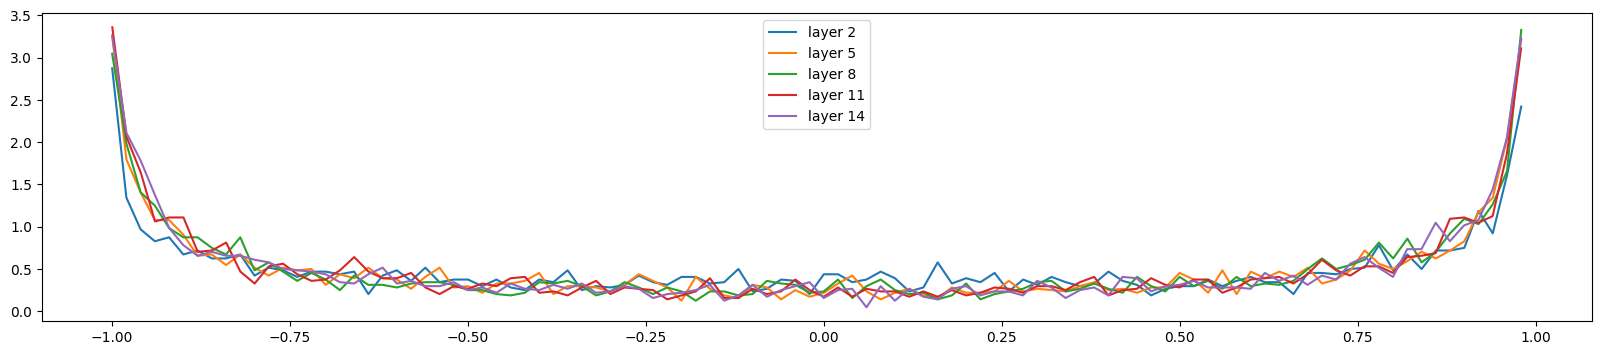

In [ ]:
# plot the tanh saturation
plt.figure(figsize = (20,4))
legends = []
for i,l in enumerate(layers[:-1]):
  if isinstance(l,Tanh):
    t = l.out
    print('layer %d (%s): mean:%+f, std:%+.2f, saturated:%+.2f%%'
    %(i, l.__class__.__name__,t.mean(),t.std(),(t.abs() > 0.97).float().mean()*100))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i}')
plt.legend(legends)


layer 2 (Tanh): mean:-0.000000, std:+4.472856e-03,
layer 5 (Tanh): mean:-0.000000, std:+4.387374e-03,
layer 8 (Tanh): mean:-0.000000, std:+4.136201e-03,
layer 11 (Tanh): mean:+0.000000, std:+4.187908e-03,
layer 14 (Tanh): mean:-0.000000, std:+3.800976e-03,


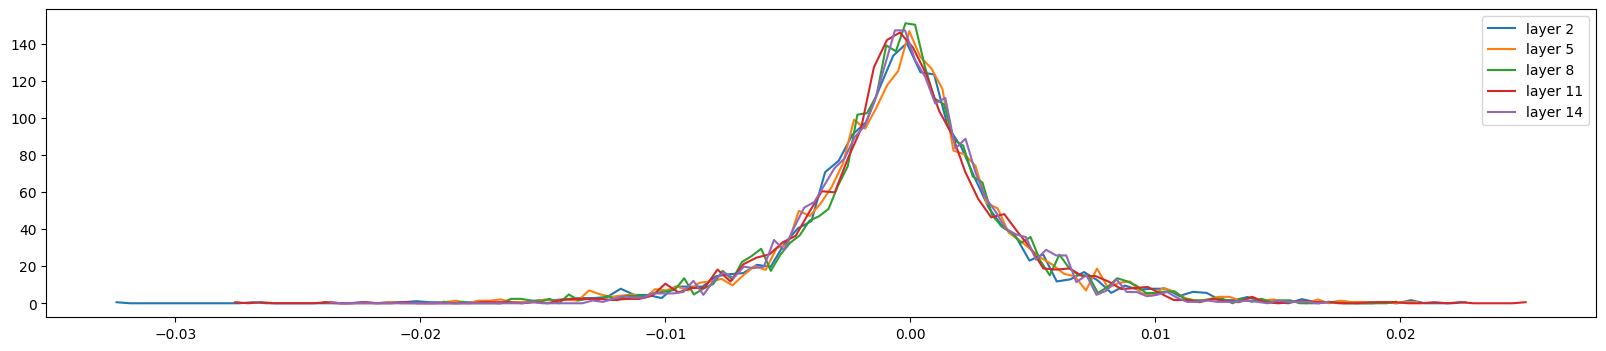

In [ ]:
# plot the gradient distribution
plt.figure(figsize = (20,4))
legends = []
for i,l in enumerate(layers[:-1]):
  if isinstance(l,Tanh):
    t = l.out.grad
    print('layer %d (%s): mean:%+f, std:%+e,'
    %(i, l.__class__.__name__,t.mean(),t.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i}')
plt.legend(legends)


weight   (27, 10) | mean +0.000000 | std 1.560285e-02 | grad:data ratio 1.432517e-02
weight  (30, 100) | mean -0.000044 | std 9.466266e-03 | grad:data ratio 2.312794e-02
weight (100, 100) | mean +0.000024 | std 6.490288e-03 | grad:data ratio 2.626117e-02
weight (100, 100) | mean +0.000109 | std 7.009032e-03 | grad:data ratio 2.880597e-02
weight (100, 100) | mean -0.000023 | std 6.416671e-03 | grad:data ratio 2.703175e-02
weight (100, 100) | mean +0.000013 | std 5.630968e-03 | grad:data ratio 2.457653e-02
weight  (100, 27) | mean +0.000003 | std 9.070915e-03 | grad:data ratio 2.762692e-02


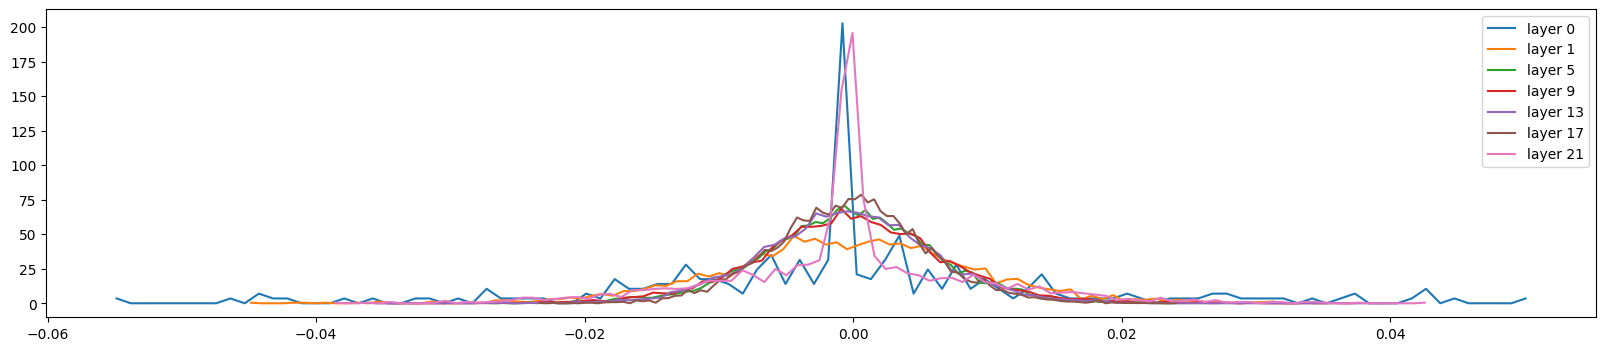

In [ ]:
#plot the gradient data
plt.figure(figsize = (20,4))
legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    t = p.grad
    print('weight %10s | mean %+f | std %e | grad:data ratio %e'
    % (tuple(p.shape), t.mean(), t.std(), t.std()/p.std()))
    hy, hx = torch.histogram(t, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'layer {i}')
plt.legend(legends)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


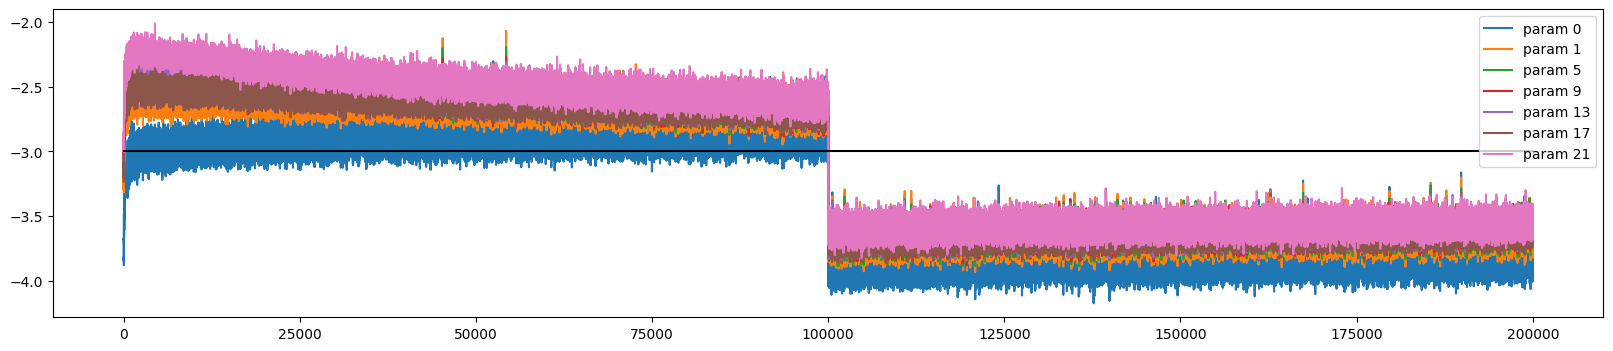

In [ ]:
#plot the udpate data
plt.figure(figsize = (20,4))
legends = []
for i,p in enumerate(parameters):
  if p.ndim == 2:
    plt.plot([ud[j][i] for j in range(len(ud))])
    legends.append('param %d' % i)
plt.plot([0,len(ud)], [-3,-3],'k')
plt.legend(legends)


In [ ]:
#validate loss
@torch.no_grad() #this decorator disables the gradient tracking
def split_loss(split):
  xi,yi = {
      'train' : {Xtr,Ytr},
      'val' : {Xdev, Ydev},
      'test': {Xte, Yte}
  }[split]
  emb = C[xi] #embed characters into vector
  x = emb.view(emb.shape[0],-1) #concat the vectors  (N, block_size * n_embd)
  for l in layers:
    if isinstance(l,BatchNorm1d):
      l.training = False;
    x = l(x)
  #loss function
  loss = F.cross_entropy(x,yi)

  print(split, loss.item())

split_loss('train')
split_loss('val')

train 2.011134386062622
val 2.0825891494750977


In [ ]:
#sample the trained model

for i in range(20):
  out = []
  context = [0] * block_size

  while True:
    #forward pass the neural network
    emb = C[torch.tensor([context])]
    x = emb.view(emb.shape[0],-1) #concat the vectors  (N, block_size * n_embd)
    for l in layers:
      if isinstance(l,BatchNorm1d):
        l.training = False;
      x = l(x)
    probs = F.softmax(x,dim=1)

    #sample for the distribution based on the probability obtained
    ix = torch.multinomial(probs,num_samples=1).item()
    context = context[1:] + [ix]
    out.append(ix)
    # if we sample special ('.') then break
    if ix == 0: break

  print(''.join(itos[i] for i in out ))

montaymyah.
see.
mad.
ryla.
remmadiendra.
grace.
kaiel.
izely.
jenne.
elisson.
arleigh.
malkia.
noshubergiagriel.
kindreelynn.
noella.
uburted.
rhylene.
elsyn.
ajahsanyah.
hal.


# Deep Neural Network - Wavenet Method




In [ ]:
model = Sequential([
    Embedding(vocab_size,n_embd),
    FlattenConsecutive(2), Linear(n_embd * 2, n_hidden, bias=False), BatchNorm1d(n_hidden),Tanh(),
    FlattenConsecutive(2), Linear(n_hidden * 2, n_hidden, bias=False), BatchNorm1d(n_hidden),Tanh(),
    FlattenConsecutive(2), Linear(n_hidden * 2, n_hidden, bias=False), BatchNorm1d(n_hidden),Tanh(),
    Linear(n_hidden,vocab_size),
])

with torch.no_grad():
  #last layer make less confident
  model.layers[-1].weight *= 0.1

parameters = model.parameters()
print(sum(p.nelement() for p in parameters))
for p in parameters:
  p.requires_grad = True


170897


In [ ]:
ix = torch.randint(0,Xtr.shape[0],(1,))
Xb, Yb = Xtr[ix], Ytr[ix]
logits = model(Xb)
for l in model.layers :
  print('%s: %s'%(l.__class__.__name__, tuple(l.out.shape)))

Embedding: (1, 8, 10)
FlattenConsecutive: (1, 4, 20)
Linear: (1, 4, 200)
BatchNorm1d: (1, 4, 200)
Tanh: (1, 4, 200)
FlattenConsecutive: (1, 2, 400)
Linear: (1, 2, 200)
BatchNorm1d: (1, 2, 200)
Tanh: (1, 2, 200)
FlattenConsecutive: (1, 400)
Linear: (1, 200)
BatchNorm1d: (1, 200)
Tanh: (1, 200)
Linear: (1, 27)


In [ ]:
for _ in range(max_steps):

  ix = torch.randint(0,Xtr.shape[0],(batch_size,))
  Xb, Yb = Xtr[ix], Ytr[ix]

  # forward pass
  logits = model(Xb)
  #loss function
  loss = F.cross_entropy(logits,Yb)

  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  lr = 0.1 if _ < 100000 else 0.01 #step learning decay
  for p in parameters:
    p.data += -lr * p.grad

  #stats
  lossi.append(loss.log10().item())

  #print stats sometimes
  if _ % 10000 == 0:
    print(f'{_:7d}/{max_steps:7d} {loss.item():.4f}')

  with torch.no_grad():
    ud.append([(lr*p.grad.std()/p.data.std()).log10().item() for p in parameters])

  #if _ >= 1000 : break

      0/ 200000 3.2847
  10000/ 200000 2.0647
  20000/ 200000 1.9722
  30000/ 200000 2.0948
  40000/ 200000 1.9738
  50000/ 200000 2.1287
  60000/ 200000 2.3574
  70000/ 200000 1.9131
  80000/ 200000 2.0735
  90000/ 200000 2.0968
 100000/ 200000 1.4963
 110000/ 200000 2.0798
 120000/ 200000 2.2252
 130000/ 200000 2.1441
 140000/ 200000 2.1806
 150000/ 200000 1.9785
 160000/ 200000 1.6792
 170000/ 200000 2.1398
 180000/ 200000 1.7523
 190000/ 200000 1.9014


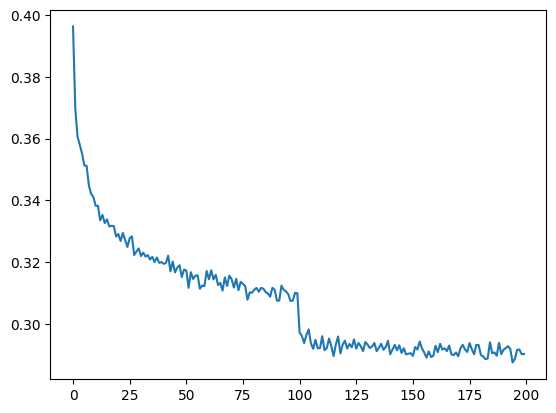

In [ ]:
plt.plot(torch.tensor(lossi).view(-1,1000).mean(1))

In [ ]:
for l in model.layers:
  l.training = False


In [ ]:
@torch.no_grad() #this decorator disables the gradient tracking
def split_loss(split):
  xi,yi = {
      'train' : {Xtr,Ytr},
      'val' : {Xdev, Ydev},
      'test': {Xte, Yte}
  }[split]
  logits = model(xi)
  #loss function
  loss = F.cross_entropy(logits,yi)

  print(split, loss.item())

split_loss('train')
split_loss('val')

train 1.9251518249511719
val 2.037414312362671


In [ ]:
#sample the trained model

for i in range(20):
  out = []
  context = [0] * block_size

  while True:
    #forward pass the neural network
    logits = model(torch.tensor([context]))
    probs = F.softmax(logits,dim=1)

    #sample for the distribution based on the probability obtained
    ix = torch.multinomial(probs,num_samples=1).item()
    context = context[1:] + [ix]
    out.append(ix)
    # if we sample special ('.') then break
    if ix == 0: break

  print(''.join(itos[i] for i in out ))

yeverie.
kya.
kylek.
tiskin.
porbyn.
abib.
meriana.
zailynn.
rayni.
dakeya.
yare.
koren.
kamilah.
ywen.
mirabella.
oluwase.
josusan.
ramiel.
ellio.
delina.


In [ ]:
model.layers[0].out[0][0].shape

torch.Size([10])

# Building ChatGPT

In [ ]:
# We always start with a dataset to train on. Let's download the tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2023-12-30 16:08:26--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2023-12-30 16:08:26 (18.2 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [ ]:
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [ ]:
# let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [ ]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [ ]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [ ]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch # we use PyTorch: https://pytorch.org
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [ ]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]
block_size = 8

In [ ]:
x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [ ]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

In [ ]:
print(xb) # our input to the transformer

tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])


In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        logits = self.token_embedding_table(idx) # (B,T,C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb, yb)
print(logits.shape)
print(loss)

print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()))


torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


In [ ]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [ ]:
batch_size = 32
for steps in range(1000): # increase number of steps for good results...

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())


2.9896976947784424


In [ ]:
print(decode(m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=1000)[0].tolist()))



RGjugv cj&insrsusowanjxJily,jupltinmUzzD&whayI'scawachfathftry
Wvissthurevon,boot g!
XxEZxER:zP kn,
YIs,GlosBMlllbinR:C nghcabOLLFIfoy l-u kATI!$j3Fb f s BHBLEN.
eDURi?poZy tedlon?INCUGUYjdaft d C'Tby,:wehatat a!UylhEYoCE::CUKINYDBjin.y w V&yARwQEXIN&
SaARingnUEMyZZadv$zXeworathTs anI mmyPSU? iptie he:ulow, vUAUNCOM.
JgofuvMBTHUFothusos.I3d
Thaveepan?OLIVvSmhift MApe hs-

veCJOLEn OINSS!UaY:CEHERrdLI'd,
PDdnema rll,rDCbHUEHNEYo,
TYGSiCKPAL:CHAHUMub-KIts;GNX$lie,p ibulisep'gm'hyoth':w,
T;.biehe LE. Cly myfitoth;Ap
WIIJlli:-geZxENGSp.
StstRLLLE3fuolguw, nevkt-hevevoiP favirgZSqX!otr tRivi-o, zPlig:
AXr:CJulwj3;Kbl mqHorwa b
pu;3Fiq-jFie CjKW?HA'DxcLUNe!:x; akety HAVll?nZRiHQjsstonnEE$'
Cq,
belaLINSP
or

Sas i,Sxh'd s?Glued tO enqusriqmont
y.KINEQYos thOFRConf&D RO'jennfZPgO f lou :liyf,
RIVlir auChe. w!II'Q-jKIN MWe,
Mauspugrds mothoefWTomCKRK:o
m;ven mKIInchinus.?qd sqmabZYiv$
DJ&EZY:
AHAq-
SivCOL:3HAT'The,pSq
SwK:

E,LI.QAutraPta!en$GSKIN!, NG, anlgbenpd,Sphicdeha
JKI d'gsa!a gCa!xZby

## The mathematical trick in self-attention

In [ ]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [ ]:
# consider the following toy example:

torch.manual_seed(1337)
B,T,C = 4,8,2 # batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [ ]:
# We want x[b,t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B,T,C))
for b in range(B):
    for t in range(T):
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0)


In [ ]:
# version 2: using matrix multiply for a weighted aggregation
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x # (B, T, T) @ (B, T, C) ----> (B, T, C)
torch.allclose(xbow, xbow2)
#plt.figure(figsize = (20,4))
#plt.plot(xbow.view(-1,16)), plt.plot(xbow2.view(-1,16));

False

In [ ]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)


False

In [ ]:
# version 4: self-attention!
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# let's see a single Head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16)
q = query(x) # (B, T, 16)
wei =  q @ k.transpose(-2, -1) # (B, T, 16) @ (B, 16, T) ---> (B, T, T)

tril = torch.tril(torch.ones(T, T))
#wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)

v = value(x)
out = wei @ v
#out = wei @ x

out.shape

torch.Size([4, 8, 16])

In [ ]:
wei[0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)

Notes:
- Attention is a **communication mechanism**. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

In [ ]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size**-0.5

In [ ]:
k.var()

tensor(1.0449)

In [ ]:
q.var()

tensor(1.0700)

In [ ]:
wei.var()

tensor(1.0918)

In [ ]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5]), dim=-1)

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

In [ ]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])*8, dim=-1) # gets too peaky, converges to one-hot

tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])

In [ ]:
class LayerNorm1d: # (used to be BatchNorm1d)

  def __init__(self, dim, eps=1e-5, momentum=0.1):
    self.eps = eps
    self.gamma = torch.ones(dim)
    self.beta = torch.zeros(dim)

  def __call__(self, x):
    # calculate the forward pass
    xmean = x.mean(1, keepdim=True) # batch mean
    xvar = x.var(1, keepdim=True) # batch variance
    xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
    self.out = self.gamma * xhat + self.beta
    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

torch.manual_seed(1337)
module = LayerNorm1d(100)
x = torch.randn(32, 100) # batch size 32 of 100-dimensional vectors
x = module(x)
x.shape

torch.Size([32, 100])

In [ ]:
x[:,0].mean(), x[:,0].std() # mean,std of one feature across all batch inputs

(tensor(0.1469), tensor(0.8803))

In [ ]:
x[0,:].mean(), x[0,:].std() # mean,std of a single input from the batch, of its features

(tensor(-9.5367e-09), tensor(1.0000))

In [ ]:
# French to English translation example:

# <--------- ENCODE ------------------><--------------- DECODE ----------------->
# les réseaux de neurones sont géniaux! <START> neural networks are awesome!<END>



### Full finished code, for reference

You may want to refer directly to the git repo instead though.

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

model = BigramLanguageModel()
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(m.generate(context, max_new_tokens=2000)[0].tolist()))


--2023-12-30 18:20:05--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2023-12-30 18:20:05 (37.9 MB/s) - ‘input.txt’ saved [1115394/1115394]

0.209729 M parameters
step 0: train loss 4.4116, val loss 4.4022
step 100: train loss 2.6568, val loss 2.6670
step 200: train loss 2.5091, val loss 2.5058
step 300: train loss 2.4197, val loss 2.4336
step 400: train loss 2.3501, val loss 2.3562
step 500: train loss 2.2963, val loss 2.3125
step 600: train loss 2.2407, val loss 2.2496
step 700: train loss 2.2054, val loss 2.2187
step 800: train loss 